CNN model

In [2]:
import pandas as pd
df = pd.read_csv("final_labeled_data_v3_3990_rows.csv")

In [3]:
df

,user_id,name,time,rating,text,pics,resp,gmap_id,spam,irrelevant,rant_without_visit,genuine_review,labeling_success,labeling_error,raw_response
0,1.140438e+20,Kanisha Mixon,1597168272670,5,Very Personable staff! Beautiful and clean env...,NaN,NaN,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
1,1.160090e+20,Brandie Hodges,1609899039594,5,Best clothing intown,NaN,NaN,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
2,1.120426e+20,Emily Miles,1611850938780,1,"Not friendly at all, as I ask questions about ...",NaN,NaN,0x886268e8fdc4fd2f:0x746533eb9aa4d4df,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
3,1.089190e+20,Faye Ahzburjn,1516515504358,4,They have beautiful baby and children's clothi...,NaN,NaN,0x886268e8fdc4fd2f:0x746533eb9aa4d4df,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
4,1.018531e+20,Amber Winn,1562178900806,3,"Cute shop, but the lack of boy clothes is sad....",NaN,NaN,0x886268e8fdc4fd2f:0x746533eb9aa4d4df,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,1.036068e+20,Ryan Goodman,1534031993592,5,Amazing! Love the blend!,NaN,NaN,0x8889226b306d0b9f:0x7179b97f91a2e880,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
3986,1.090318e+20,Scott Wanninger,1527713868220,3,Pales in comparison to the Avondale location.,NaN,NaN,0x8889226b306d0b9f:0x7179b97f91a2e880,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
3987,1.108760e+20,Catherine Maynard,1538202179053,5,Loveeeeee,NaN,NaN,0x8889226b306d0b9f:0x7179b97f91a2e880,0,0,0,0,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."
3988,1.128192e+20,Gabriel Hastings,1535681659022,5,Get the 4:20 nachos,NaN,NaN,0x8889226b306d0b9f:0x7179b97f91a2e880,0,0,0,1,True,NaN,"```json\n[\n {\n ""Label"": ""spam"",\n ""Co..."


In [4]:
import pandas as pd

# Keep only relevant text + a single label
df_text_label = df[["text", "genuine_review", "irrelevant", "spam", "rant_without_visit"]].copy()

# If your goal is to classify "genuine_review (1)" vs "not genuine (0)"
df_text_label["label"] = df_text_label["genuine_review"]

# If instead you want a **multi-class setup** (spam, irrelevant, rant, genuine)
# You can do:
def assign_label(row):
    if row["spam"] == 1:
        return "spam"
    elif row["irrelevant"] == 1:
        return "irrelevant"
    elif row["rant_without_visit"] == 1:
        return "rant_without_visit"
    elif row["genuine_review"] == 1:
        return "genuine_review"
    else:
        return "unlabeled"

df_text_label["label"] = df_text_label.apply(assign_label, axis=1)

# Finally keep just text + label
df_final = df_text_label[["text", "label"]]

print(df_final.head())



                                                text           label
0  Very Personable staff! Beautiful and clean env...  genuine_review
1                               Best clothing intown  genuine_review
2  Not friendly at all, as I ask questions about ...  genuine_review
3  They have beautiful baby and children's clothi...  genuine_review
4  Cute shop, but the lack of boy clothes is sad....  genuine_review


In [5]:
df_final[df_final['label']=='spam']

,text,label
373,ADVANCE CASH LOANS IS THE BEST AND GREATEST LO...,spam
619,"Tensleigh is the best ever, come see this girl...",spam
1534,ADVANCE CASH LOANS IS THE BEST AND GREATEST LO...,spam
1780,"Tensleigh is the best ever, come see this girl...",spam
2779,Y'all Call McAdams Towing for all your towing ...,spam


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical


df = df_final

# Encode labels into numbers
label_encoder = LabelEncoder()
df["label_enc"] = label_encoder.fit_transform(df["label"])
y = to_categorical(df["label_enc"])   # one-hot encoding for multi-class

# -----------------------------
# 2. Tokenize & Pad text
# -----------------------------
X = df["text"].astype(str).values

max_words = 5000   # vocabulary size
max_len = 100      # max tokens per review

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding="post", truncating="post")

# -----------------------------
# 3. Train / Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Build CNN Model
# -----------------------------
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(y.shape[1], activation="softmax")  # multi-class output
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert one-hot y back to class indices
y_integers = np.argmax(y_train, axis=1)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_integers),
    y=y_integers
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Train with weights
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights
)


/tmp/ipython-input-3161151449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label_enc"] = label_encoder.fit_transform(df["label"])
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_10         │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Class Weights: {0: np.float64(0.2278372591006424), 1: np.float64(3.6272727272727274), 2: np.float64(8.512), 3: np.float64(127.68), 4: np.float64(4.764179104477612)}
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.5577 - loss: 1.4785 - val_accuracy: 0.8158 - val_loss: 1.0912
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6959 - loss: 1.1430 - val_accuracy: 0.8045 - val_loss: 0.6930
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8028 - loss: 1.1341 - val_accuracy: 0.8910 - val_loss: 0.3609
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.8739 - loss: 0.5623 - val_accuracy: 0.8784 - val_loss: 0.3601
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8986 - loss: 0.3415 - val_accuracy: 0.9023 - val_loss: 0.3252


Test Accuracy: 0.9023
Test Loss: 0.3252
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


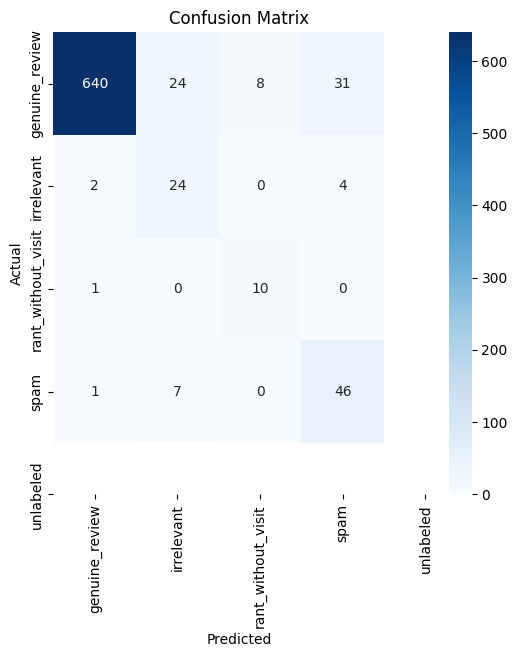


Classification Report:



ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 6. Evaluate Model
# -----------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")

# -----------------------------
# Confusion Matrix
# -----------------------------
# If multi-class (softmax)
y_pred_probs = model.predict(X_test)

# Example: if spam = class index 0
spam_threshold = 0.3
y_pred = []
for prob in y_pred_probs:
    if prob[0] > spam_threshold:   # spam probability
        y_pred.append(0)           # spam
    else:
        y_pred.append(np.argmax(prob))  # normal argmax

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report for precision, recall, f1
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# -----------------------------
# 7. Predict Example
# -----------------------------
sample_texts = ["This shop is wonderful", "ADVANCE CASH LOANS IS THE BEST AND GREATEST LO...	"]
sample_seq = tokenizer.texts_to_sequences(sample_texts)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding="post", truncating="post")

predictions = model.predict(sample_pad)
pred_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

for t, l in zip(sample_texts, pred_labels):
    print(f"Text: {t} --> Predicted Label: {l}")
